In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [35]:
# Cargar el dataset
df = pd.read_csv("dataset/customer_shopping_data.csv")

In [36]:
# Convertir la fecha a formato datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Crear una nueva columna con el mes y año para análisis temporal
df['month_year'] = df['invoice_date'].dt.to_period('M')

# Crear una columna de gasto total (precio * cantidad)
df['total_spend'] = df['price'] * df['quantity']

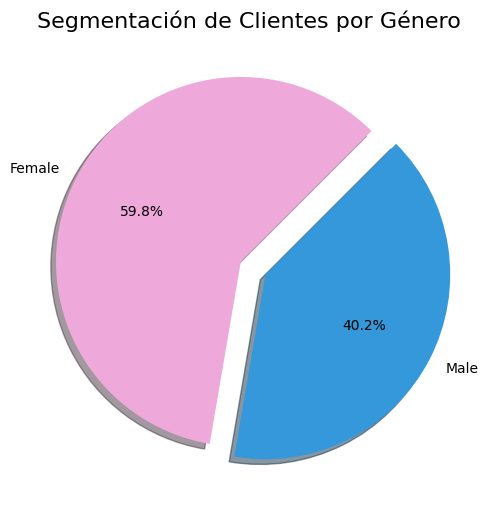

In [37]:
# 1. Grafica pastel 
plt.figure(figsize=(10, 6))
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#eea9da', '#3498DB'], 
                   startangle=45, explode=(0.05, 0.1), shadow=True)
plt.title('Segmentación de Clientes por Género', fontsize=16)
plt.ylabel('')
# Guardar el gráfico en carpeta assets
plt.savefig("assets/grafico_genero.png")
plt.show()
plt.close()

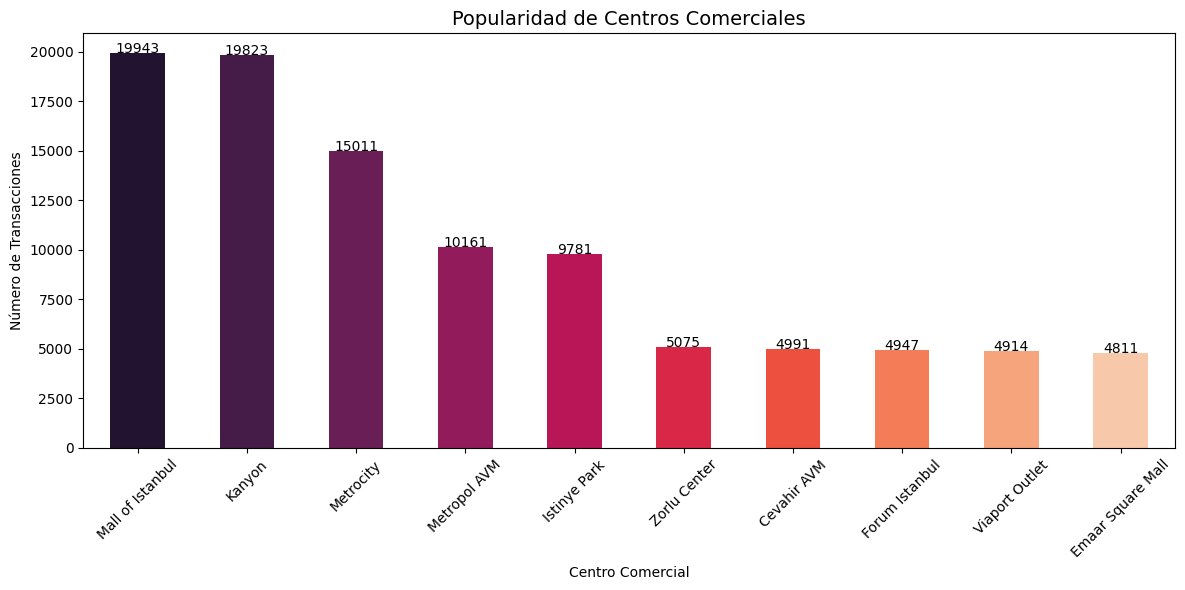

In [38]:
# 2. Centros Comerciales más Visitados
plt.figure(figsize=(12, 6))
mall_counts = df['shopping_mall'].value_counts()
ax = mall_counts.plot(kind='bar', color=sns.color_palette("rocket", len(mall_counts)))
plt.title('Popularidad de Centros Comerciales', fontsize=14)
plt.xlabel('Centro Comercial')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
# Añadir etiquetas de valores
for i, v in enumerate(mall_counts):
    ax.text(i, v + 5, str(v), ha='center')
plt.tight_layout()
plt.savefig('assets/centroComercial_popular.png')
plt.show()
plt.close()

In [39]:
# 3. Compras dias a la semanas y horas
df['day_of_week'] = df['invoice_date'].dt.day_name()
# Agregamos una columna de hora simulada (en un caso real, usarías la hora real)
np.random.seed(42)
df['hour'] = np.random.randint(9, 22, size=len(df))

# Ordenar los días de la semana correctamente
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order = list(range(9, 22))

# Crear un pivot table para el heatmap
purchases_by_day_hour = pd.crosstab(index=df['day_of_week'], columns=df['hour'])
# Reordenar para tener los días de la semana en orden
purchases_by_day_hour = purchases_by_day_hour.reindex(day_order)


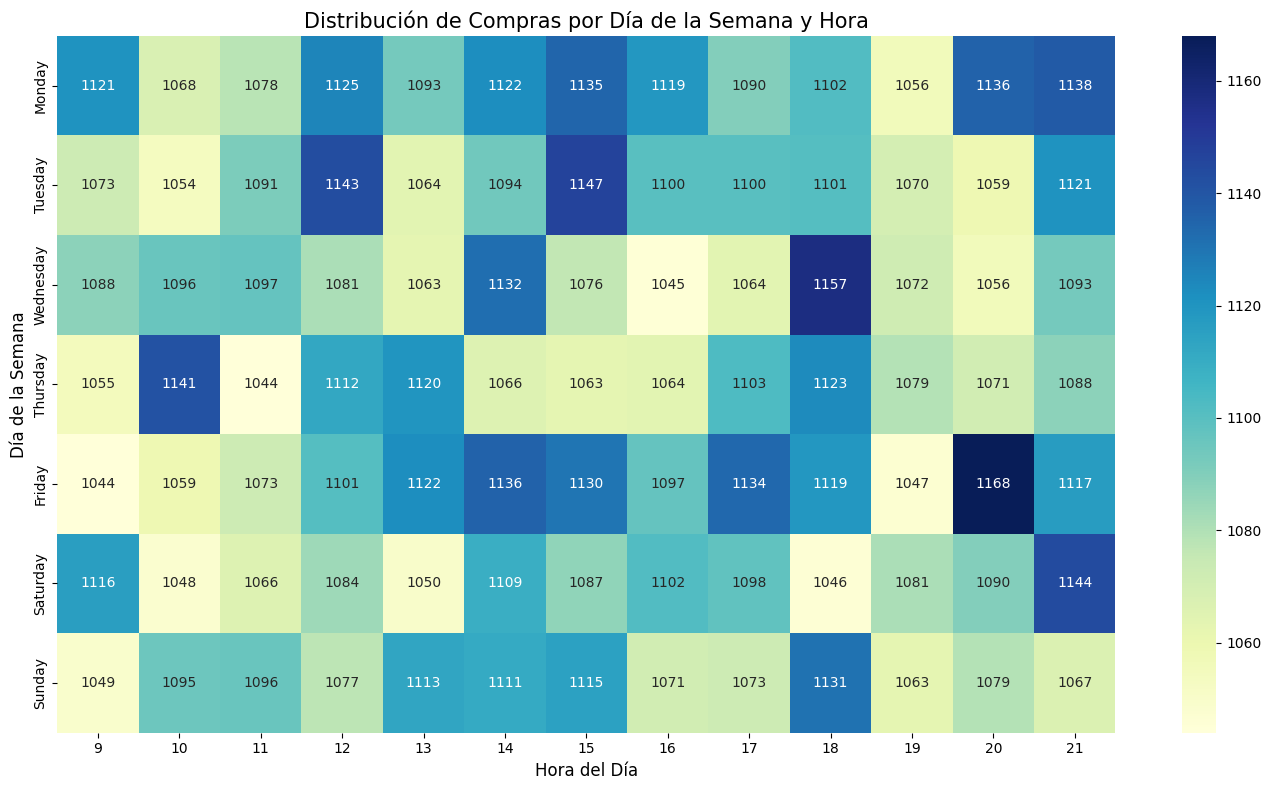

In [40]:

plt.figure(figsize=(14, 8))
sns.heatmap(purchases_by_day_hour, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Distribución de Compras por Día de la Semana y Hora', fontsize=15)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Día de la Semana', fontsize=12)
plt.tight_layout()
plt.savefig('assets/compras_dias_semanas_heatmap.png')
plt.show()
plt.close()

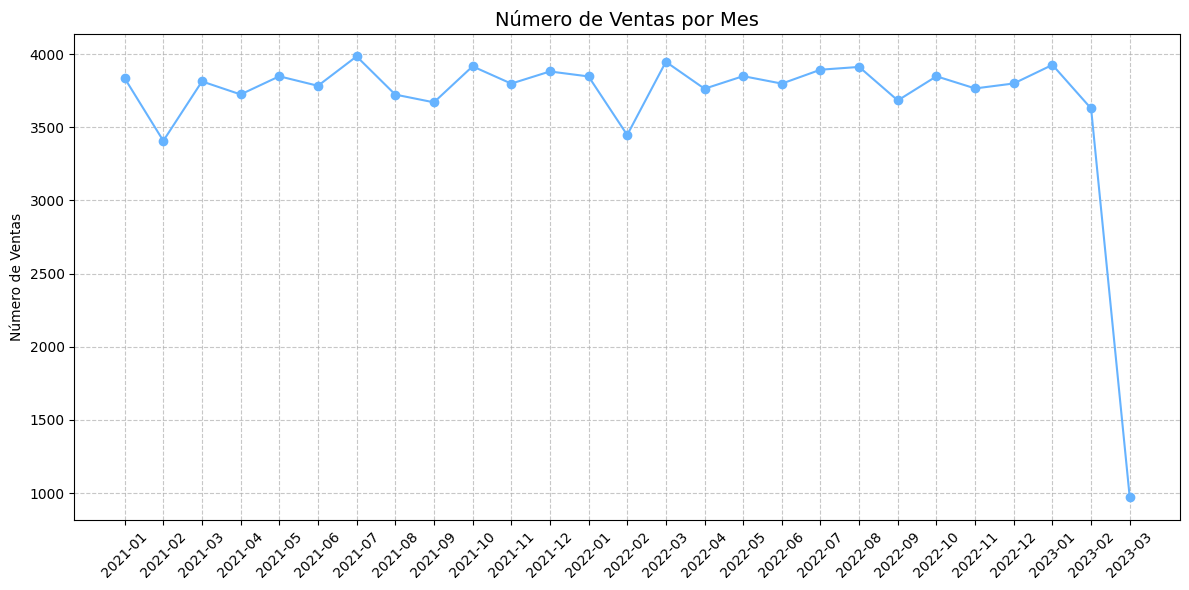

In [42]:
# 4. Tendencia de Ventas Mensuales
monthly_sales = df.groupby(df['invoice_date'].dt.to_period('M')).size()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Ventas por mes
ax1.plot(range(len(monthly_sales)), monthly_sales.values, marker='o', linestyle='-', color='#66b3ff')
ax1.set_title('Número de Ventas por Mes', fontsize=14)
ax1.set_ylabel('Número de Ventas')
ax1.grid(True, linestyle='--', alpha=0.7)

# Establecer las etiquetas del eje x como los meses
plt.xticks(range(len(monthly_sales)), [str(date) for date in monthly_sales.index], rotation=45)
plt.tight_layout()
plt.savefig('assets/numeros_ventas_mes.png')
plt.show()
plt.close()


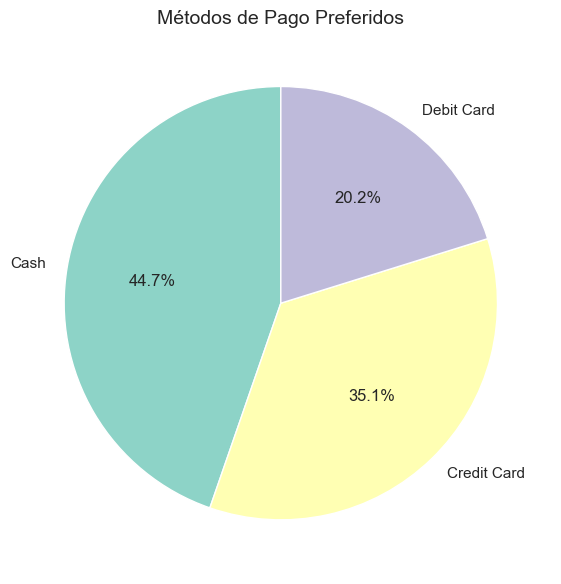

In [57]:
#5. Métodos de Pago Preferidos
plt.figure(figsize=(10, 6))
payment_counts = df['payment_method'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%', 
                   colors=sns.color_palette("Set3", len(payment_counts)),
                   startangle=90)
plt.title('Métodos de Pago Preferidos', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.savefig('assets/metodos_pagos.png')
plt.show()
plt.close()

<Figure size 1400x1000 with 0 Axes>

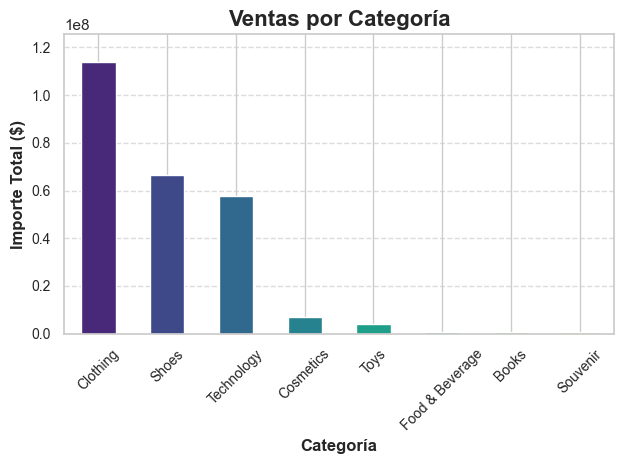

In [ ]:
# 6. Ventas por Categoría

# Realizar la consulta sobre el dataframe df
df_category_sales = df.groupby('category').agg(
    numero_ventas=('invoice_no', 'count'),
    unidades_vendidas=('quantity', 'sum'),
    importe_total=('total_spend', 'sum')
).reset_index()

# Ordenar por importe_total en orden descendente
df_category_sales = df_category_sales.sort_values(by='importe_total', ascending=False)

# Graficar los datos
plt.figure(figsize=(14, 10))  # Aumentar el tamaño de la figura
ax = df_category_sales.plot(x='category', y='importe_total', kind='bar', 
                            color=sns.color_palette("viridis", len(df_category_sales)), legend=False)
plt.title('Ventas por Categoría', fontsize=16, fontweight='bold')
plt.xlabel('Categoría', fontsize=12, fontweight='bold')
plt.ylabel('Importe Total ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, df_category_sales['importe_total'].max() * 1000)  # Ajustar el límite del eje y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('assets/ventas_por_categoria.png')
plt.show()
plt.close()
